# Autor: Filip Savić

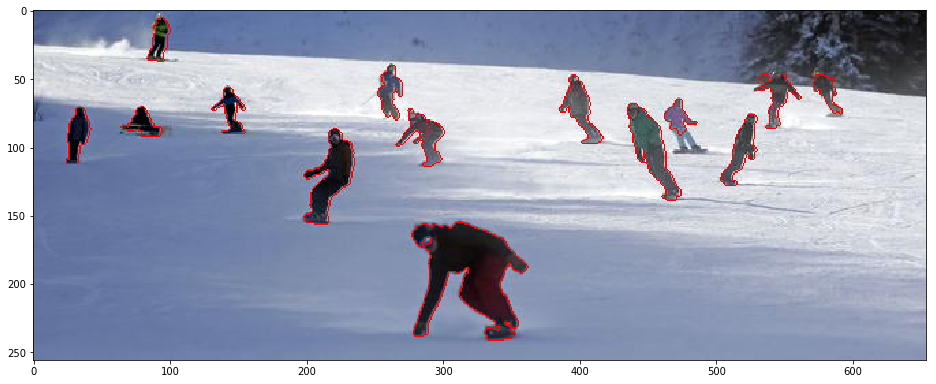

In [153]:
import matplotlib.pyplot as plt  
# iscrtavanje slika i plotova unutar samog browsera
%matplotlib inline 

import matplotlib.pylab as pylab
# prikaz vecih slika 
pylab.rcParams['figure.figsize'] = 16,12

import numpy as np
import cv2

img_snowboarders = cv2.imread('../slike/snowboarders.jpg')
img_snowboarders = cv2.cvtColor(img_snowboarders, cv2.COLOR_BGR2RGB)
plt.imshow(img_snowboarders)

img_snowboarders_gs = cv2.cvtColor(img_snowboarders, cv2.COLOR_RGB2GRAY) # konvert u grayscale
img_snowboarders_bin = cv2.adaptiveThreshold(img_snowboarders_gs, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 151, 40)

img_ero = img_snowboarders_bin.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
img_ero = cv2.erode(img_snowboarders_bin, kernel, iterations=1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
img_ero = cv2.dilate(img_ero, kernel, iterations=1)

img_with_conts, contours, hierarchy = cv2.findContours(img_ero, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img = img_snowboarders.copy()

contours_snowboarders = [] #ovde ce biti samo konture koje oznacavaju snoubordere
for contour in contours:
    x,y,width,height = cv2.boundingRect(contour) # x i y su koordinate gornjeg lijevog tjemena pravougaonika 
    if height > 20 and width < 200:
        contours_snowboarders.append(contour)

cv2.drawContours(img, contours_snowboarders, -1, (255, 0, 0), 1)
plt.imshow(img)

In [152]:
print len(contours_snowboarders)

14
